## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
from PIL import Image
# python imageing library simillar to cv2

### Drawing the square 

In [6]:
sample_image =  np.zeros(shape = ( 500 , 500, 3))

#drawing = False
# inital_x = -1
# inital_y = -1



def create_rectangle(event , x, y , flags , param):
    global inital_x , inital_y , drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        inital_x, inital_y = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:  # till the mouse moves rectangle is drawn
        if drawing == True:
            cv2.rectangle(sample_image , (inital_x, inital_y) ,(x,y) ,(255 , 0 , 0) , -1)
            
            
    elif event == cv2.EVENT_LBUTTONUP:  # when you leave the mouse button rectangle creation stops
        drawing = False
        cv2.rectangle(sample_image , (inital_x , inital_y),(x,y) ,(255 , 0 , 0) , -1)
        
        
cv2.namedWindow(winname = "sample_image")        
cv2.setMouseCallback("sample_image" , create_rectangle)




while True:
    cv2.imshow("sample_image", sample_image)
    if cv2.waitKey(30)  & 0xff == 27:   
        break
        
cv2.destroyAllWindows()


### Face detection

In [7]:
image = cv2.imread(r"G:\cnn\some images\child.JPG")

In [8]:
face_cascade = cv2.CascadeClassifier(r"G:\cnn\Harcascade-20221010T045212Z-001\Harcascade\haarcascade_frontalface_alt.xml")


In [273]:
def  face_detection(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img) # this face_rects is just x and y postion and height & breadth of rectangle
    
    for ( x, y , w, h) in face_rects:
        cv2.rectangle(face_img  ,(x, y) , (x+w , y+h) , (255, 0, 0) , 1)  # drawing the red rectangle on face
    return face_img


In [252]:
image_with_rect = face_detection(image)

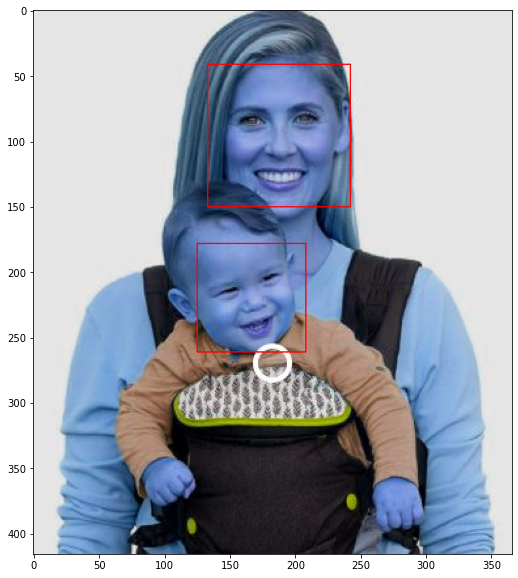

In [253]:
plt.figure(figsize=(10,10))
plt.imshow(image_with_rect)

In [276]:
imga = cv2.imread(r"E:\night shoot\IMG_8383.JPG",cv2.IMREAD_GRAYSCALE)
imga = cv2.cvtColor(imga, cv2.COLOR_BGR2RGB)


In [281]:
# cv2 will not give an error  the file is readen or not 

In [277]:
face_cascade = cv2.CascadeClassifier(r"G:\cnn\Harcascade-20221010T045212Z-001\Harcascade\haarcascade_frontalface_alt.xml")


In [278]:


def  face_detection(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img) # this face_rects is just x and y postion and height & breadth of rectangle
    
    for ( x, y , w, h) in face_rects:
        cv2.rectangle(face_img  ,(x, y) , (x+w , y+h) , (255, 0, 0) , 1)  # drawing the red rectangle on face
    return face_img


In [279]:
image_with_rect = face_detection(imga)

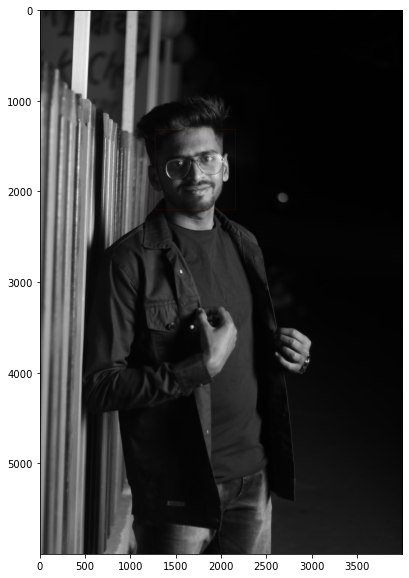

In [280]:
plt.figure(figsize=(10,10))
plt.imshow(image_with_rect)

In [282]:
eye_cascade= cv2.CascadeClassifier(r"G:\cnn\Harcascade-20221010T045212Z-001\Harcascade\haarcascade_eye.xml")

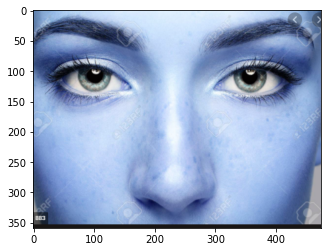

In [295]:
image1 = cv2.imread(r"G:\cnn\some images\eyes.PNG")
plt.imshow(image1)

In [299]:
eye_cascade= cv2.CascadeClassifier(r"G:\cnn\Harcascade-20221010T045212Z-001\Harcascade\haarcascade_eye.xml")

## Eye Detection

In [300]:
def  eye_detection(img):
    face_img = img.copy()
    
    eye_rects = eye_cascade.detectMultiScale(face_img) # this face_rects is just x and y postion and height & breadth of rectangle
    
    for ( x, y , w, h) in eye_rects:
        cv2.rectangle(face_img  ,(x, y) , (x+w , y+h) , (255, 0, 0) , 5)  # drawing the red rectangle on face
    return face_img


In [301]:
image_with_rect = eye_detection(image1)

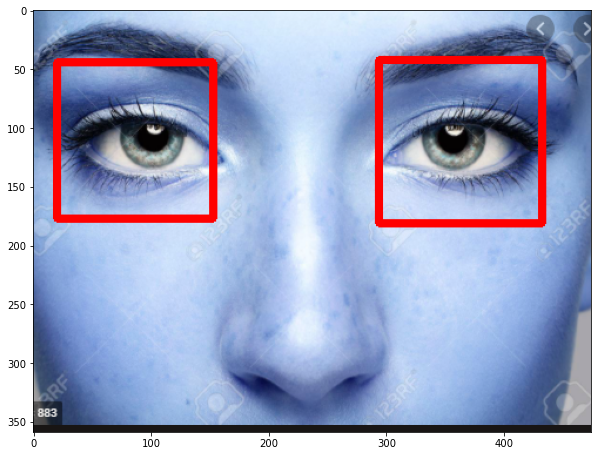

In [302]:
plt.figure(figsize=(10,10))
plt.imshow(image_with_rect)

### This is read and it capture our face 

In [306]:
cap = cv2.VideoCapture(0)

while True :
    
    ret , frame = cap.read(0)
    frame = face_detection(frame)
    cv2.imshow('eye_detection',frame)
    
    
    k = cv2.waitKey(1)
    
    if k == 27 :   
        break

cap.release()
cv2.destroyAllWindows()


### Eye detection using camera 

In [308]:
cap = cv2.VideoCapture(0)

while True :
    
    ret , frame = cap.read(0)
    frame = eye_detection(frame)
    cv2.imshow('Face_detection' , frame)
    k = cv2.waitKey(1)
    
    if k == 27 :   # if i hit escape button it will stop recording
        break

cap.release()
cv2.destroyAllWindows()
